In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/trainining_dataset.zip

Archive:  /content/drive/MyDrive/trainining_dataset.zip
  inflating: trainining_dataset.csv  


In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "/content/trainining_dataset.csv"
dataset = pd.read_csv(path)

Exploration

In [26]:
print(len(dataset)) #35'162'432

35162432


In [25]:
dataset.head(5)

,Unnamed: 0,timestamp,location_id,measurements
0,0,1.246493e+09,0,-79.500000
1,1,1.246493e+09,1,-397.619995
2,2,1.246493e+09,2,238.770004
3,3,1.246493e+09,3,-381.690002
4,4,1.246493e+09,4,-32.470001


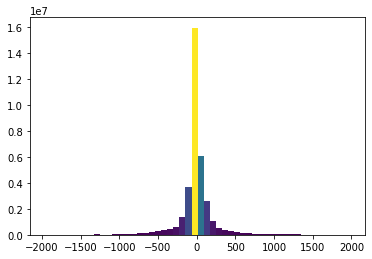

In [22]:
n_bins = 50
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter



N, bins, patches = plt.hist(dataset["measurements"], bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
plt.savefig("grafico_distribuzione.png")
plt.show()

In [5]:

print("Measuraments")
print("max: ",max(dataset["measurements"]))
print("min: ",min(dataset["measurements"]))
print("avg: ",dataset["measurements"].mean())
print()

print("Location_id")
print("max: ",max(dataset["location_id"]))
print("min:",min(dataset["location_id"]))

from datetime import datetime

timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)
print()


print("Timestamp")
print("max: ",datetime.fromtimestamp(max(dataset["timestamp"])))
print("min: ",datetime.fromtimestamp(min(dataset["timestamp"])))
print("max: ",max(dataset["timestamp"]))
print("min: ",min(dataset["timestamp"]))

Measuraments
max:  1978.6099853515625
min:  -1953.75
avg:  0.37659970636326867

Location_id
max:  1915
min: 0

Timestamp
max:  2009-12-20 09:55:00
min:  2009-07-02 00:00:00
max:  1261302900.0
min:  1246492800.0


In [32]:
#count null value and zero value
zero_value = len(dataset[dataset["measurements"]==0])
print("count zero value: ", zero_value)
print("percent zero value: ", zero_value/len(dataset))

count zero value:  8360539
percent zero value:  0.23776907695121885


##LSTM

In [6]:
X = []
y = []
i=0
for index, row in dataset.iterrows():
    X.append((row["timestamp"],row["location_id"]))
    y.append(row["measurements"])
    i=i+1
    if i==10000:
      break



In [ ]:
print(X[0],y[0])

(1246492800.0, 0.0) -79.5


In [ ]:
X = np.expand_dims(X, axis=-1)

In [ ]:
X = np.expand_dims(X, axis=1)

In [ ]:
print(np.shape(X))

(10000, 2)


In [ ]:
from sklearn.model_selection import train_test_split
#split dataset
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=123)

In [1]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, return_sequences=False,activation='relu', input_shape=(2,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# fit model
history = model.fit(np.array(X_train), 
          np.array(y_train),
          batch_size=64, 
          epochs=100, 
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),)

Epoch 1/100
110/110 [==============================] - 0s 3ms/step - loss: 4457715712.0000 - val_loss: 2644356352.0000
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 8792037376.0000 - val_loss: 4234919936.0000
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 9002354688.0000 - val_loss: 1440611328.0000
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 16094797824.0000 - val_loss: 21589078016.0000
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 5897050624.0000 - val_loss: 1579251.8750
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 5641157120.0000 - val_loss: 347300128.0000
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 6385038848.0000 - val_loss: 55483868.0000
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 3897063680.0000 - val_loss: 3291232000.0000
Epoch 9/100
110/110 [==============================]

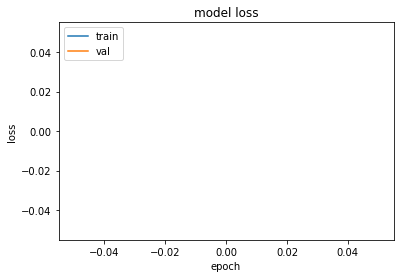

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
model.save_weights('init_wights.h5')

In [ ]:
def predict(model,data):
  t = np.expand_dims(data, axis=-1)
  t = np.expand_dims(t, axis=0)
  return model.predict(t)

predict(model,data_conversion_for_predict(data_to_predict))

array([[-344442.]], dtype=float32)

In [ ]:
def retrain_model(new_data,model):
  new_entry_X = np.expand_dims(new_data[0:2], axis=-1)
  new_entry_X = np.expand_dims(new_entry_X, axis=0)

  new_entry_y = np.array(new_data[2])
  print(np.shape(new_entry_X))
  print(new_entry_X)
  print(new_entry_y)
  model.fit(np.array(new_entry_X),np.array(np.expand_dims(new_entry_y, axis=0)),epochs=1,batch_size=1,verbose=1)

retrain_model([1246494000,419,-39.759998],model)



(1, 2, 1)
[[[1246494000]
  [       419]]]
-39.759998
1/1 [==============================] - 2s 2s/step - loss: 100594844958720.0000


In [ ]:
data_train="{\"timestamp\":1.2807108E9,\"location_id\":0,\"measurement\":332.8999938964844}"
data_to_predict="{\"timestamp\":1.2807108E9,\"location_id\":0}"
import json

def data_conversion_for_train(data):
  data = json.loads(data)
  return [float(data["timestamp"]),float(data["location_id"]),float(data["measurement"])]

def data_conversion_for_predict(data):
  data = json.loads(data)
  return [float(data["timestamp"]),float(data["location_id"])]

print(data_conversion_for_train(data_train))
print(data_conversion_for_predict(data_to_predict))

[1280710800.0, 0.0, 332.8999938964844]
[1280710800.0, 0.0]


In [ ]:
retrain_model(data_conversion_for_train(data_train),model)

(1, 2, 1)
[[[1.2807108e+09]
  [0.0000000e+00]]]
332.8999938964844
1/1 [==============================] - 0s 392ms/step - loss: 1839237431296.0000


In [ ]:
print(len(dataset))

35162432


##Dense Neural Network

In [7]:
#take only firs 10000
data = dataset[0:100000]

In [8]:
#hot econding location
one_hot = pd.get_dummies(data["location_id"]) 
data = data.drop('location_id',axis = 1)
data = data.join(one_hot)
data.drop(data.columns[0], axis=1, inplace=True)
print(data)

          timestamp  measurements  0  1  2  ...  1911  1912  1913  1914  1915
0      1.246493e+09    -79.500000  1  0  0  ...     0     0     0     0     0
1      1.246493e+09   -397.619995  0  1  0  ...     0     0     0     0     0
2      1.246493e+09    238.770004  0  0  1  ...     0     0     0     0     0
3      1.246493e+09   -381.690002  0  0  0  ...     0     0     0     0     0
4      1.246493e+09    -32.470001  0  0  0  ...     0     0     0     0     0
...             ...           ... .. .. ..  ...   ...   ...   ...   ...   ...
99995  1.246508e+09    395.190002  0  0  0  ...     0     0     0     0     0
99996  1.246508e+09    679.849976  0  0  0  ...     0     0     0     0     0
99997  1.246508e+09   -552.510010  0  0  0  ...     0     0     0     0     0
99998  1.246508e+09   -403.890015  0  0  0  ...     0     0     0     0     0
99999  1.246508e+09   -430.489990  0  0  0  ...     0     0     0     0     0

[100000 rows x 1918 columns]


In [9]:
#normalize to a day timestamp
measuraments = "measurements"
y = data.pop(measuraments)
X = data
X["timestamp"] = X["timestamp"] % 86400

In [10]:
#split dataset
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=123)

In [30]:
# model
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

input_lenght = len(X_train.columns)

model = Sequential()
model.add(Dense(input_lenght, input_dim=input_lenght, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1))
model.compile(optimizer="adam", loss='mse')

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1917)              3676806   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1964032   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1025      
Total params: 6,691,463
Trainable params: 6,691,463
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.load_weights("512.h5")

In [26]:
# fit model
history = model.fit(np.array(X_train), 
          np.array(y_train),
          batch_size=256, 
          epochs=100, 
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)))

Epoch 1/100
274/274 [==============================] - 2s 8ms/step - loss: 33853.6250 - val_loss: 33289.9102
Epoch 2/100
274/274 [==============================] - 2s 7ms/step - loss: 33852.0742 - val_loss: 33312.5195
Epoch 3/100
274/274 [==============================] - 2s 7ms/step - loss: 33859.1992 - val_loss: 33312.7773
Epoch 4/100
274/274 [==============================] - 2s 7ms/step - loss: 33857.0078 - val_loss: 33307.2266
Epoch 5/100
274/274 [==============================] - 2s 7ms/step - loss: 33864.6680 - val_loss: 33286.4414
Epoch 6/100
274/274 [==============================] - 2s 7ms/step - loss: 33890.8633 - val_loss: 33295.7383
Epoch 7/100
274/274 [==============================] - 2s 7ms/step - loss: 33869.6094 - val_loss: 33292.3789
Epoch 8/100
274/274 [==============================] - 2s 7ms/step - loss: 33864.2773 - val_loss: 33287.3359
Epoch 9/100
274/274 [==============================] - 2s 7ms/step - loss: 33862.2500 - val_loss: 33294.8398
Epoch 10/100
274/27

KeyboardInterrupt: ignored

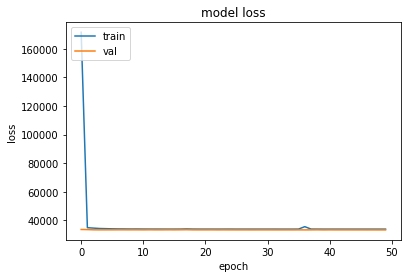

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("2048.png")
plt.show()


In [22]:
def one_hotencode(number):
  array = np.zeros((input_lenght-1), dtype=int)
  array[number]=1
  return array

def convert_second_of_the_day(timestamp):
  return timestamp % 86400

model.predict(np.array(X_train)[1].reshape(1,1917))

array([[-1.0045271]], dtype=float32)

In [ ]:
print(one_hotencode(1915))
print(one_hotencode(1))
print(one_hotencode())

[0 0 0 ... 0 0 1]
[0 1 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:
#62000
#test dataset
from sklearn.metrics import mean_squared_error
test_quantity=5000
test = dataset[100000:(100000+test_quantity)]

X_test = []
y_true = []
for index, row in test.iterrows():
    X_test.append(np.concatenate((np.array(convert_second_of_the_day(row["timestamp"])), one_hotencode(int(row["location_id"]))), axis=None))
    y_true.append(row["measurements"])

y_pred = []
for i in X_test:
  y_pred.append(model.predict(np.array(i).reshape(1,input_lenght)).reshape(1))


print(np.shape(y_pred))
print(np.shape(y_true))
y_true = np.array(y_true).reshape(test_quantity,1)
mean_squared_error(y_true,y_pred)


(5000, 1)
(5000,)


26927.00642024697

In [ ]:
print(dataset["measurements"].max())
print(dataset["measurements"].min())

1978.6099853515625
-1953.75


In [ ]:
print(X_train["timestamp"].max())
print(X_train["timestamp"].min())

1500.0
0.0


In [ ]:
model.save('model_dense.h5')

In [18]:
import json

def one_hotencode(number):
  array = np.zeros((input_lenght-1), dtype=int)
  array[number]=1
  return array

def convert_second_of_the_day(timestamp):
  return timestamp % 86400

def retrain(data):
  data = json.loads(data)
  data = [float(data["timestamp"]),float(data["location_id"]),float(data["measurement"])]
    
  new_entry_X = np.expand_dims(np.concatenate((np.array(convert_second_of_the_day(data[0])), one_hotencode(int(data[1]))), axis=None) ,axis=0)
  new_entry_y = np.expand_dims(data[2], axis=0)

  model.fit(new_entry_X,new_entry_y,epochs=1,verbose=1)
  model.save_weights("weights_after_training.h5")

  return model

In [ ]:
def predict(data):
  
  to_predict = np.expand_dims(np.concatenate((np.array(convert_second_of_the_day(data[0])), one_hotencode(int(data[1]))), axis=None) ,axis=0)
  return model.predict(to_predict.reshape(1,1917))

data = "{\"timestamp\":1.2835944E9,\"location_id\":0}"
data = json.loads(data)
data = [float(data["timestamp"]),float(data["location_id"])]
predict(data)

array([[1856.6849]], dtype=float32)

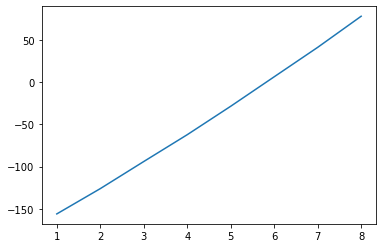

In [66]:
result = []

i=1000
while 1:
  prediction = model.predict(np.expand_dims(np.concatenate((np.array(i), one_hotencode(3)), axis=None) ,axis=0))
  result.append(prediction[0,0])
  i=i+1000
  if i>8460:
    break

y=np.array(result)
x=[1,2,3,4,5,6,7,8]
plt.plot(x,y)
plt.show()


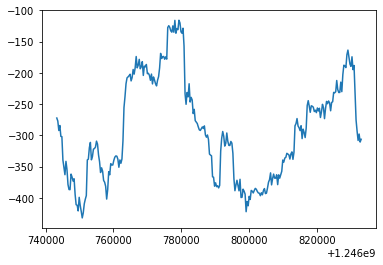

In [16]:
location=1
y=dataset[dataset["location_id"]==location]["measurements"][300:600]
x=dataset[dataset["location_id"]==location]["timestamp"][300:600]

first=1246492800
last=first+8460


#1246492800.0
plt.plot(x,y)
plt.savefig("seasonality.png")
plt.show()